In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib
import random
import matplotlib.image as mpimg

In [15]:
#get the data
dir_path='../../Data/pizza_steak/'
for dirpath, dirnames, filenames in os.walk(f'{dir_path}'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ../../Data/pizza_steak/
There are 2 directories and 0 images in ../../Data/pizza_steak/test
There are 0 directories and 250 images in ../../Data/pizza_steak/test\pizza
There are 0 directories and 250 images in ../../Data/pizza_steak/test\steak
There are 2 directories and 0 images in ../../Data/pizza_steak/train
There are 0 directories and 750 images in ../../Data/pizza_steak/train\pizza
There are 0 directories and 750 images in ../../Data/pizza_steak/train\steak


In [16]:
data_dir=pathlib.Path(f'{dir_path}/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [17]:
#lets visualize our images
def view_random_image(target_dir, target_class):
    target_folder=target_dir+target_class
    random_img=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+'/'+random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (384, 512, 3)


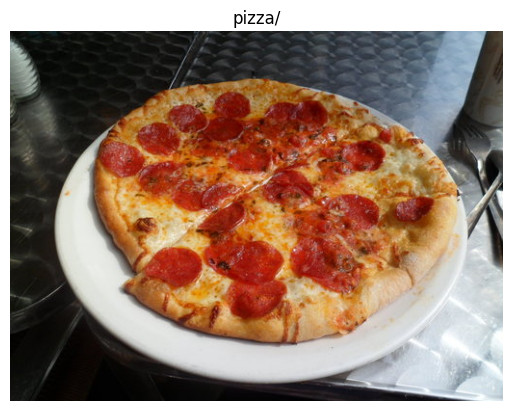

In [21]:
img=view_random_image(f'{dir_path}/train/','pizza/')